In [1]:
import pandas as pd 
import numpy as np

In [15]:
file_path = r'C:\Users\serik\Downloads\example (1).xlsx'
df1 = pd.read_excel(file_path)

In [16]:
from IPython.display import display
display(df1)

,instrument,working_capital,retained_earnings_-_total,total_assets,earnings_before_interest_&_taxes_(ebit),total_liabilities,revenue_from_business_activities_-_total,company_market_cap,total_current_assets,total_current_liabilities,cash_&_cash_equivalents,trade_accounts_&_trade_notes_receivable_-_net,gross_profit_-_industrials/property_-_total,income_before_taxes,net_income_after_tax,total_shareholders'_equity_incl_minority_intr_&_hybrid_debt,inventories_-_total,debt_-_long-term_-_total,earnings_before_interest_taxes_depreciation_&_amortization
0,ESCA.OQ,149.257,144.881,298.718,4.883,140.243,72.136,198.733083,188.198,38.941,3.967,57.419,15.673,3.594,2.704,158.475,121.870,87.738,5.739
1,ESCA.OQ,159.730,143.699,320.324,4.220,163.035,74.904,138.350343,209.433,49.703,4.000,65.258,12.989,3.244,2.958,157.289,134.957,99.568,5.824
2,ESCA.OQ,151.384,142.403,316.852,8.189,160.859,94.337,135.224550,204.336,52.952,6.195,60.011,22.869,7.270,5.673,155.993,130.246,94.040,10.319
3,ESCA.OQ,144.927,138.034,307.061,9.023,155.442,72.380,176.470397,201.014,56.087,6.392,67.301,19.549,8.506,6.654,151.619,114.605,92.850,10.496
4,ESCA.OQ,122.862,133.122,251.798,6.409,105.183,73.444,178.111982,171.055,48.193,4.374,65.991,15.888,5.973,4.871,146.615,92.382,50.396,7.309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4646,OLY1.WA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4647,OLY1.WA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4648,OLY1.WA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4649,OLY1.WA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df1.columns = df1.columns.str.lower().str.replace(" ", "_")
df1.dropna(inplace=True)
print(df.shape)

(2103, 19)


In [20]:
df1 = df1.rename(columns={"total_shareholders'_equity_incl_minority_intr_&_hybrid_debt": "total_shareholders_equity"})

In [21]:
A = df1['working_capital'] / df1['total_assets']
B = df1['retained_earnings_-_total'] / df1['total_assets']
C = df1['earnings_before_interest_&_taxes_(ebit)'] / df1['total_assets']
D = df1['company_market_cap'] / df1['total_liabilities']
E = df1['revenue_from_business_activities_-_total'] / df1['total_assets']

df2 = pd.DataFrame({
    'altman_z_score': 1.2 * A + 1.4 * B + 3.3 * C + 0.6 * D + 1.0 * E
})

df2['current_ratio'] = df1['total_current_assets'] / df1['total_current_liabilities']
df2['quick_ratio'] = (df1['cash_&_cash_equivalents'] + df1['trade_accounts_&_trade_notes_receivable_-_net']) / df1['total_current_liabilities']
df2['cash_ratio'] = df1['cash_&_cash_equivalents'] / df1['total_current_liabilities']
df2['gross_profit_margin'] = (df1['gross_profit_-_industrials/property_-_total'] / df1['revenue_from_business_activities_-_total']) * 100
df2['operating_margin'] = (df1['earnings_before_interest_&_taxes_(ebit)'] / df1['revenue_from_business_activities_-_total']) * 100
df2['net_profit_margin'] = (df1['net_income_after_tax'] / df1['revenue_from_business_activities_-_total']) * 100
df2['pretax_profit_margin'] = (df1['income_before_taxes'] / df1['revenue_from_business_activities_-_total']) * 100
df2['ROA'] = (df1['net_income_after_tax'] / df1['total_assets']) * 100
df2['ROE'] = (df1['net_income_after_tax'] / df1['total_shareholders_equity']) * 100
df2['Inventory_turnover'] = (df1['revenue_from_business_activities_-_total'] - df1['gross_profit_-_industrials/property_-_total']) / df1['inventories_-_total']
df2['Asset_turnover'] = df1['revenue_from_business_activities_-_total'] / df1['total_assets']
df2['D/E'] = df1['debt_-_long-term_-_total'] / df1['total_shareholders_equity']
df2['D/Capital'] = df1['debt_-_long-term_-_total'] / (df1['debt_-_long-term_-_total'] + df1['total_shareholders_equity'])
df2['D/EBITDA'] = df1['debt_-_long-term_-_total'] / df1['earnings_before_interest_taxes_depreciation_&_amortization']
df2['Interest_coverage'] = df1['earnings_before_interest_&_taxes_(ebit)'] / (df1['earnings_before_interest_&_taxes_(ebit)'] - df1['income_before_taxes'])

In [22]:
df2['synthetic_credit_score'] = 0.3139 * df2['current_ratio'] + 0.2784 * df2['D/Capital'] + 0.1431 * df2['Inventory_turnover'] + 0.0820 * df2['gross_profit_margin'] + 0.0676 * df2['Asset_turnover'] + 0.0534 * df2['cash_ratio'] + 0.0470 * df2['ROA'] + 0.0441 * df2['quick_ratio'] + 0.0437 * df2['Interest_coverage'] + 0.0416 * df2['ROE'] + 0.0280 * df2['D/E'] + 0.0243 * df2['net_profit_margin'] + 0.0162 * df2['D/EBITDA'] + 0.0073 * df2['operating_margin'] + 0.0052 * df2['pretax_profit_margin'] 

In [28]:
df2.isnull().sum()

altman_z_score            0
current_ratio             0
quick_ratio               0
cash_ratio                0
gross_profit_margin       1
operating_margin          0
net_profit_margin         0
pretax_profit_margin      0
ROA                       0
ROE                       0
Inventory_turnover        0
Asset_turnover            0
D/E                       0
D/Capital                 0
D/EBITDA                  0
Interest_coverage         0
synthetic_credit_score    5
dtype: int64

In [32]:
df2.dropna(inplace=True)

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr, kendalltau

In [33]:
constant_columns = df2.columns[df2.nunique() <= 1]
print("Constant columns:", constant_columns)

Constant columns: Index([], dtype='object')


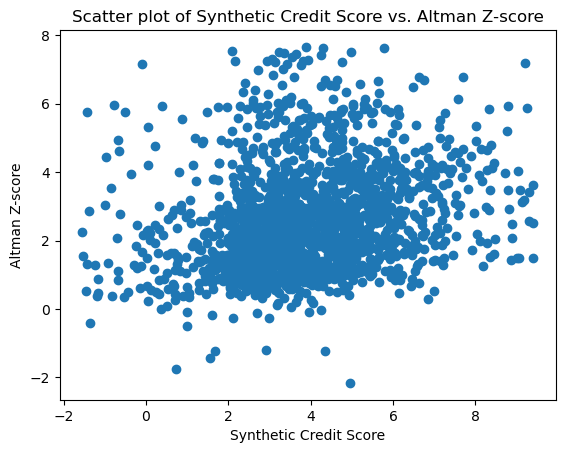

In [38]:
plt.scatter(df2_no_outliers['synthetic_credit_score'], df2_no_outliers['altman_z_score'])
plt.xlabel('Synthetic Credit Score')
plt.ylabel('Altman Z-score')
plt.title('Scatter plot of Synthetic Credit Score vs. Altman Z-score')
plt.show()

In [35]:
Q1 = df2[['synthetic_credit_score', 'altman_z_score']].quantile(0.25)
Q3 = df2[['synthetic_credit_score', 'altman_z_score']].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df2_no_outliers = df2[~((df2[['synthetic_credit_score', 'altman_z_score']] < lower_bound) | (df2[['synthetic_credit_score', 'altman_z_score']] > upper_bound)).any(axis=1)]


In [36]:
spearman_corr, spearman_p = spearmanr(df2_no_outliers['synthetic_credit_score'], df2_no_outliers['altman_z_score'])
kendall_corr, kendall_p = kendalltau(df2_no_outliers['synthetic_credit_score'], df2_no_outliers['altman_z_score'])

print(f"Spearman's rank correlation: {spearman_corr}, p-value: {spearman_p}")
print(f"Kendall's rank correlation: {kendall_corr}, p-value: {kendall_p}")


Spearman's rank correlation: 0.28161768039668755, p-value: 2.4282423817889377e-32
Kendall's rank correlation: 0.19095068047372146, p-value: 4.190279990939444e-32


In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [77]:
min_synthetic_credit_score = df2['synthetic_credit_score'].min()
min_altman_z_score = df2['altman_z_score'].min()

constant_synthetic_credit_score = abs(min_synthetic_credit_score) + 1
constant_altman_z_score = abs(min_altman_z_score) + 1

In [78]:
df2['adjusted_synthetic_credit_score'] = df2['synthetic_credit_score'] + constant_synthetic_credit_score
df2['adjusted_altman_z_score'] = df2['altman_z_score'] + constant_altman_z_score

In [79]:
df2['log_adjusted_synthetic_credit_score'] = np.log(df2['adjusted_synthetic_credit_score'])
df2['log_adjusted_altman_z_score'] = np.log(df2['adjusted_altman_z_score'])

In [80]:
import statsmodels.api as sm

In [81]:
df2_cleaned = df2.replace([np.inf, -np.inf], np.nan).dropna(subset=['log_adjusted_synthetic_credit_score', 'log_adjusted_altman_z_score'])

In [82]:
X = df2_cleaned['log_adjusted_synthetic_credit_score']
X = sm.add_constant(X)

Y = df2_cleaned['log_adjusted_altman_z_score']

model = sm.OLS(Y, X).fit()

r_squared = model.rsquared

print(f"R-squared value: {r_squared}")

R-squared value: 0.08970056209885358


In [76]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import numpy as np

X = df2['synthetic_credit_score'].values.reshape(-1, 1)
y = df2['altman_z_score'].values

print(np.isnan(X).sum())  
print(np.isnan(y).sum()) 

X = X.astype('float32')

X = np.where(X > np.percentile(X, 99), np.percentile(X, 99), X)
X = np.where(X < np.percentile(X, 1), np.percentile(X, 1), X)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

rf = RandomForestRegressor(n_estimators=150, random_state=1)

rf.fit(X_scaled, y)

rf_r_squared = rf.score(X_scaled, y)
print(f"Random Forest R-squared: {rf_r_squared}")


0
0
Random Forest R-squared: 0.7158025006825648
